<a href="https://colab.research.google.com/github/HowardHNguyen/Python/blob/main/Exploratory_Data_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install wquantiles

In [3]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np

from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [5]:
AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

#**Estimates of Location**


In [6]:
# read data files from g drive
airline_stats = pd.read_csv('/content/drive/MyDrive/data/airline_stats.csv')
kc_tax = pd.read_csv('/content/drive/MyDrive/data/kc_tax.csv.gz')
lc_loans = pd.read_csv('/content/drive/MyDrive/data/lc_loans.csv')
dfw_airline = pd.read_csv('/content/drive/MyDrive/data/dfw_airline.csv')
sp500_data = pd.read_csv('/content/drive/MyDrive/data/sp500_data.csv.gz')
sp500_sectors = pd.read_csv('/content/drive/MyDrive/data/sp500_sectors.csv')
state = pd.read_csv('/content/drive/MyDrive/data/state.csv')
print(airline_stats.head())
print(kc_tax.head())
print(lc_loans.head())
print(dfw_airline.head())
print(sp500_data.head())
print(sp500_sectors.head())
print(state.head())

   pct_carrier_delay  pct_atc_delay  pct_weather_delay   airline
0           8.153226       1.971774           0.762097  American
1           5.959924       3.706107           1.585878  American
2           7.157270       2.706231           2.026706  American
3          12.100000      11.033333           0.000000  American
4           7.333333       3.365591           1.774194  American
   TaxAssessedValue  SqFtTotLiving  ZipCode
0               NaN           1730  98117.0
1          206000.0           1870  98002.0
2          303000.0           1530  98166.0
3          361000.0           2000  98108.0
4          459000.0           3150  98108.0
        status grade
0   Fully Paid     B
1  Charged Off     C
2   Fully Paid     C
3   Fully Paid     C
4      Current     B
    Carrier      ATC   Weather  Security    Inbound
0  64263.16  84856.5  11235.42    343.15  118427.82
   Unnamed: 0  ADS        CA      MSFT  RHT  CTSH       CSC       EMC  \
0  1993-01-29  0.0  0.060124 -0.022100  0.0

In [7]:
# The trimmed mean can be thought of as a compromise between the median and the mean: it is robust to
# extreme values in the data, but uses more data to calculate the estimate for location.
# Compute the mean, trimmed mean, and median for Population. For mean and median we can use the pandas methods of the data frame.
# The trimmed mean requires the trim_mean function in scipy.stats.
print(state['Population'].mean())
print(trim_mean(state['Population'], 0.1)) # trim=0.1 drops 10% from each end).
print(state['Population'].median())
# the mean is bigger than the trimmed mean, which is bigger than the median as well

6162876.3
4783697.125
4436369.5


In [8]:
# the weighted median is a value such that the sum of the weights is equal for the lower and upper halves
# of the sorted list. Like the median, the weighted median is robust to outliers.
# Weighted mean is available with numpy. For weighted median, we can use the specialised
# package wquantiles (https://pypi.org/project/wquantiles/).
print(state['Murder.Rate'].mean())

4.066


In [9]:
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


In [10]:
# Weighted mean is available with NumPy. For weighted median, we can use the specialized package wquantiles
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.4


In [11]:
# To compute mean and median in Python we can use the pandas methods of the data
# frame. The trimmed mean requires the trim_mean function in scipy.stats:
print(state['Population'].mean())
print(trim_mean(state['Population'], 0.1))
print(state['Population'].median())

6162876.3
4783697.125
4436369.5


#**Variability Estimates of Population**

In [12]:
# the interquartile range (IQR), and the median absolute deviation from the median (MAD), we can compute estimates
# of variability for the state population data:
print(state['Population'].std())

#Interquartile range is calculated as the difference of the 75% and 25% quantile.
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

# Median absolute deviation from the median can be calculated with a method in statsmodels
print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

6848235.347401142
4847308.0
3849876.1459979336
3849876.1459979336


In [ ]:
# The standard deviation is almost twice as large as the MAD (in R, by default, the scale
# of the MAD is adjusted to be on the same scale as the mean). This is not surprising
# since the standard deviation is sensitive to outliers.

In [13]:
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


# **PERCENTILES AND BOXPLOTS**

Pandas has the quantile method for data frames.

In [14]:
print(state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [15]:
percentages = [0.05,0.25,0.5,0.75,0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


Pandas provides a number of basic exploratory plots; one of them are boxplots

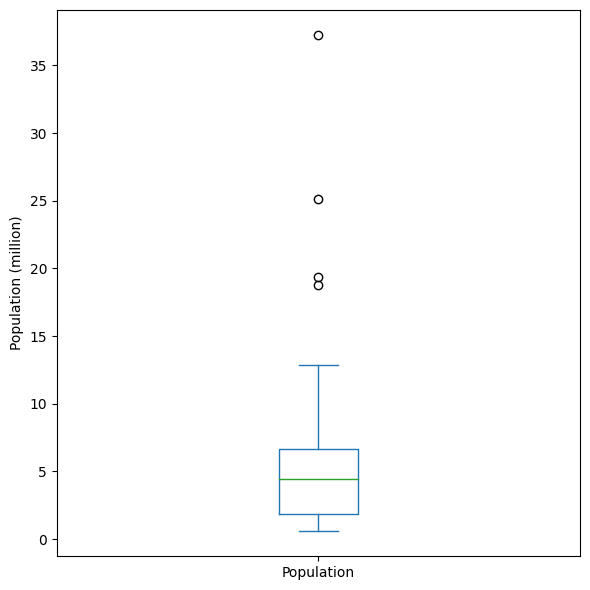

In [17]:
ax = (state['Population'] / 1_000_000).plot.box(figsize=(6,6))
ax.set_ylabel('Population (million)')
plt.tight_layout()
plt.show()

# **EXPLORING THE DATA DISTRIBUTION**

Each of the estimates we’ve covered sums up the data in a single number to describe the location or variability of the data. It is also useful to explore how the data is distributed overall.

# **Frequency Table and Histograms**
The cut method for pandas data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method value_counts returns a frequency table.

In [ ]:
# FREQUENCY TABLES AND HISTOGRAMS
# A frequency table of a variable divides up the variable range into equally spaced segments
# and tells us how many values fall within each segment.

In [18]:
# The function pandas.cut creates a series that maps the values into the segments.
# Using the method value_counts, we get the frequency table:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


In [19]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

The least populous state is Wyoming, with 563,626 people, and the most populous is California, with 37,253,956 people. This gives us a range of 37,253,956 – 563,626 = 36,690,330, which we must divide up into equal size bins—let’s say 10 bins. With 10 equal size bins, each bin will have a width of 3,669,033, so the first bin will span from 563,626 to 4,232,658. By contrast, the top bin, 33,584,923 to 37,253,956, has only one state: California. The two bins immediately below California are empty, until we reach Texas. It is important to include the empty bins; the fact that there are no values in those bins is useful information. It can also be useful to experiment with different bin sizes. If they are too large, important features of the distribution can be obscured.
If they are too small, the result is too granular, and the ability to see the bigger picture is lost.

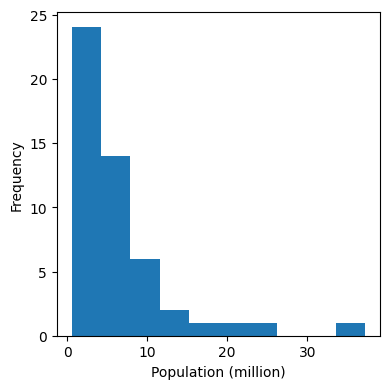

In [20]:
# A histogram is a way to visualize a frequency table, with bins on the x-axis and the data count on the y-axis.
# Pandas also supports histograms for exploratory data analysis.

ax = (state['Population'] / 1_000_000).plot.hist(figsize = (4,4))
ax.set_xlabel('Population (million)')

plt.tight_layout()
plt.show()

#**DENSITY ESTIMATES**
Density is an alternative to histograms that can provide more insight into the distribution of the data points. Use the argument bw_method to control the smoothness of the density curve.

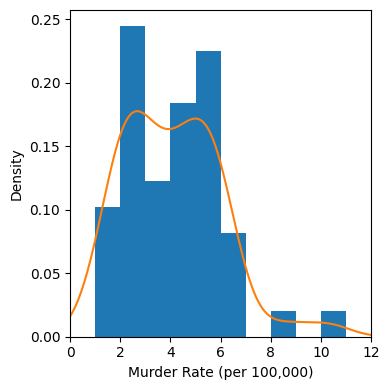

In [21]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12],
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

# **Exploring Binary and Categorical Data**

*For categorical data, simple proportions or percentages tell the story of the data.*

**Key Terms for Exploring Categorical Data**

Mode: The most commonly occurring category or value in a data set.

Expected value: When the categories can be associated with a numeric value, this gives an average value based on a category’s probability of occurrence.

Bar charts: The frequency or proportion for each category plotted as bars.

Pie charts: The frequency or proportion for each category plotted as wedges in a pie.

In [27]:
# Table 1-6
dfw = dfw_airline
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


Bar charts, seen often in the popular press, are a common visual tool for displaying a single categorical variable. Categories are listed on the x-axis, and frequencies or proportions on the y-axis. Figure 1-5 shows the airport delays per year by cause for Dallas/Fort Worth (DFW), and it is produced with the R function barplot:

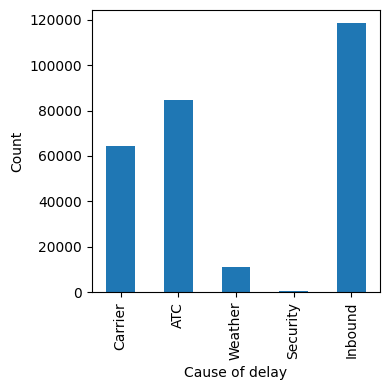

In [30]:
# Pandas also supports bar charts for displaying a single categorical variable.
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

# **CORRELATION**
Exploratory data analysis in many modeling projects (whether in data science or in research) involves examining correlation among predictors, and between predictors and a target variable. Variables X and Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go with low values of Y. If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.

**Key Terms for Correlation**

Correlation coefficient: A metric that measures the extent to which numeric variables are associated with one another (ranges from -1 to +1).

Correlation matrix:A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables.

Scatterplot: A plot in which the x-axis is the value of one variable, and the y-axis the value of another.

In [32]:
sp500_px = pd.read_csv('/content/drive/MyDrive/data/sp500_data.csv.gz', index_col=0)
sp500_sym = pd.read_csv('/content/drive/MyDrive/data/sp500_sectors.csv')

In [33]:
print(sp500_data.head(8))
print(sp500_sym.head(5))

   Unnamed: 0  ADS        CA      MSFT  RHT  CTSH       CSC       EMC  \
0  1993-01-29  0.0  0.060124 -0.022100  0.0   0.0  0.018897  0.007368   
1  1993-02-01  0.0 -0.180389  0.027621  0.0   0.0  0.018889  0.018425   
2  1993-02-02  0.0 -0.120257  0.035900  0.0   0.0 -0.075573  0.029482   
3  1993-02-03  0.0  0.060124 -0.024857  0.0   0.0 -0.151128  0.003689   
4  1993-02-04  0.0 -0.360770 -0.060757  0.0   0.0  0.113350 -0.022114   
5  1993-02-05  0.0  0.030058  0.093892  0.0   0.0  0.094453 -0.047907   
6  1993-02-08  0.0  0.030066 -0.060750  0.0   0.0 -0.113350 -0.011057   
7  1993-02-09  0.0 -0.090190 -0.063521  0.0   0.0 -0.132239 -0.014746   

        IBM       XRX  ...  WAT  ALXN      AMGN  BXLT     BIIB     CELG  \
0  0.092165  0.259140  ...  0.0   0.0  0.347160   0.0  0.04167  0.00000   
1  0.115207 -0.100775  ...  0.0   0.0 -0.231440   0.0  0.00000 -0.01041   
2 -0.023041  0.028796  ...  0.0   0.0 -0.115720   0.0  0.00000  0.00000   
3 -0.253454 -0.043190  ...  0.0   0.0 -0.0

In [34]:
# Table 1-7
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


In [35]:
# Next we focus on funds traded on major exchanges (sector == 'etf').
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

Due to the large number of columns in this table, looking at the correlation matrix is cumbersome and it's more convenient to plot the correlation as a heatmap. The seaborn package provides a convenient implementation for heatmaps.


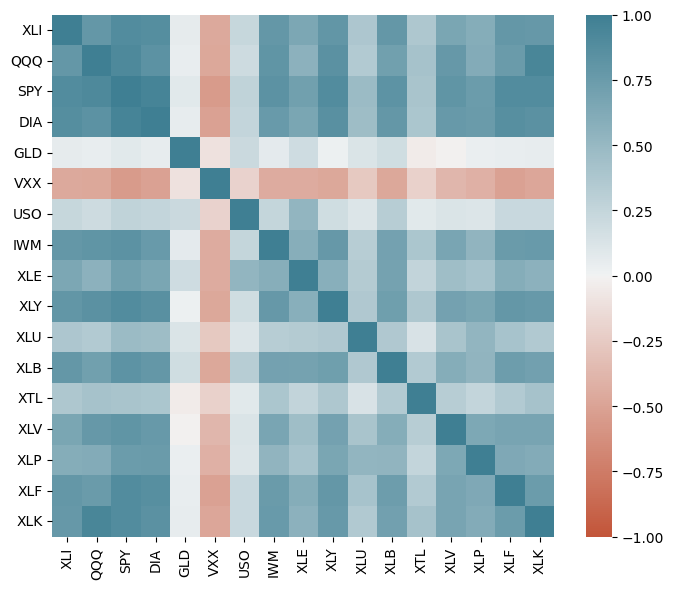

In [36]:
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

The above heatmap works when you have color. For the greyscale images, as used in the book, we need to visualize the direction as well. The following code shows the strength of the correlation using ellipses.

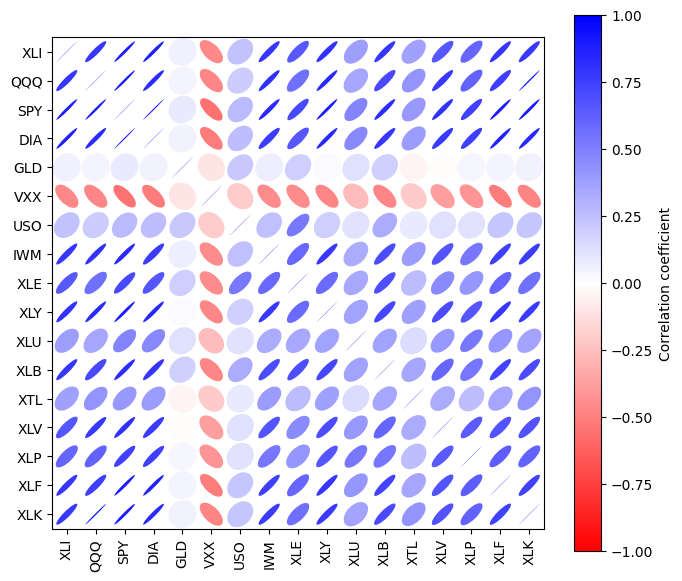

In [37]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(7, 6), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

# **Scatterplots**
Simple scatterplots are supported by pandas. Specifying the marker as $\u25EF$ uses an open circle for each point.

The standard way to visualize the relationship between two measured data variables is with a scatterplot. The x-axis represents one variable and the y-axis another, and each point on the graph is a record. See Figure 1-7 for a plot of the correlation between the daily returns for ATT and Verizon.

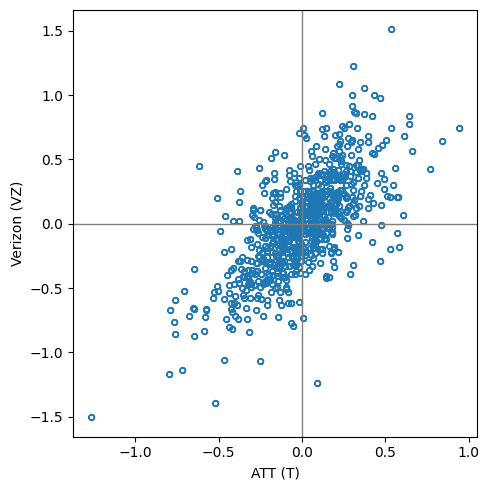

In [38]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(5, 5), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

Line2D(_child2)


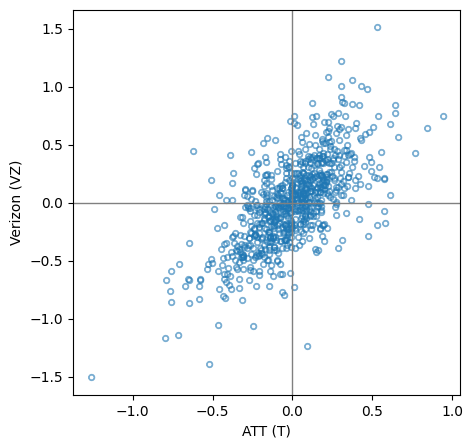

In [39]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(5, 5), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

# **Exploring Two or More Variables**
Load the kc_tax dataset and filter based on a variety of criteria

In [40]:
kc_tax = pd.read_csv('/content/drive/MyDrive/data/kc_tax.csv.gz')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


# **Hexagonal binning and Contours**
## Plotting numeric versus numeric data
If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The hexbin method for pandas data frames is one powerful approach.

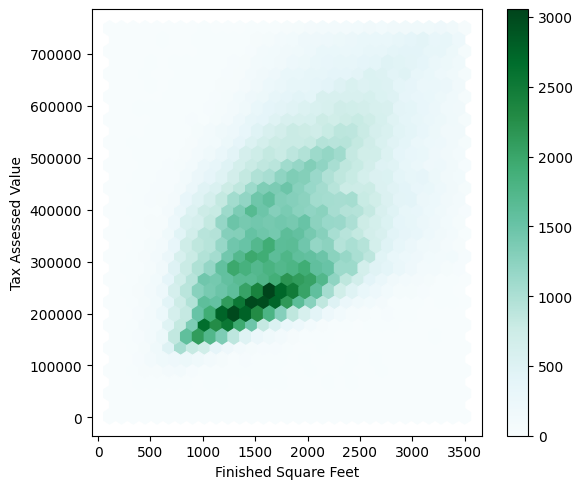

In [41]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(6, 5))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

The seaborn kdeplot is a two-dimensional extension of the density plot. The calculation of the 2D-density for the full dataset takes several minutes. It is sufficient to create the visualization with a smaller sample of the dataset. With 10,000 data points, creating the graph takes only seconds. While some details may be lost, the overall shape is preserved.

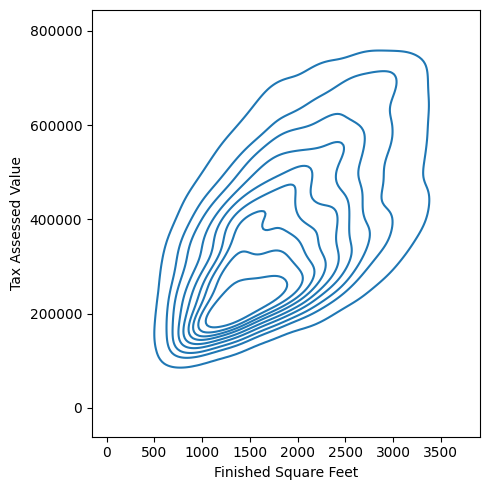

In [42]:
fig, ax = plt.subplots(figsize=(5,5))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

# **Two Categorical Variables**
Load the lc_loans dataset

In [43]:
lc_loans = pd.read_csv('/content/drive/MyDrive/data/lc_loans.csv')

In [44]:
# Table 1-8(1)
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [45]:
# Table 1-8(2)
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


# **Categorical and Numeric Data**
Pandas boxplots of a column can be grouped by a different column.

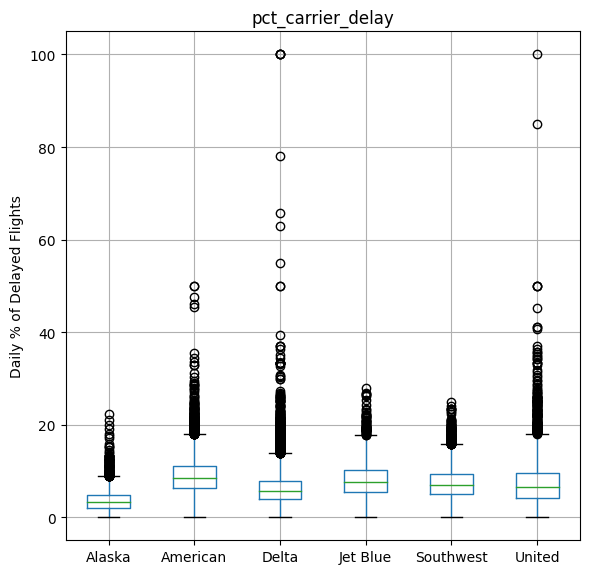

In [46]:
airline_stats = pd.read_csv('/content/drive/MyDrive/data/airline_stats.csv')
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(6, 6))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

Pandas also supports a variation of boxplots called violinplot.

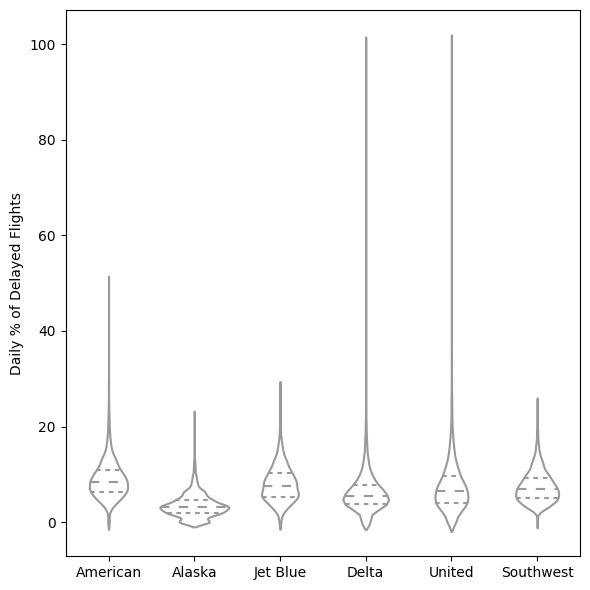

In [47]:
fig, ax = plt.subplots(figsize=(6,6))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

# **Visualizing Multiple Variables**

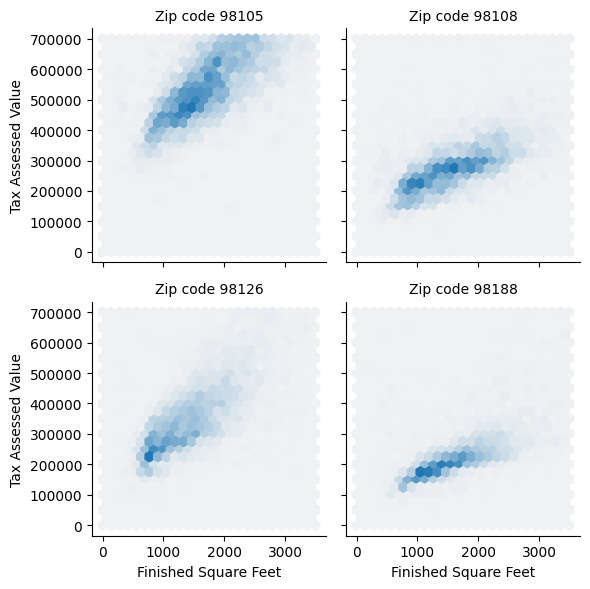

In [48]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()